In [30]:
%load_ext pycodestyle_magic
%flake8_on

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from Preprocessing import *

import warnings
warnings.filterwarnings('ignore')

Train samples: 307511
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 23s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 13s
Installments payments df shape: (339587, 26)
Process installments payments - done in 29s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 21s
Starting LightGBM. Train shape: (206029, 797), test shape: (101478, 797)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.805374	training's binary_logloss: 0.232632	valid_1's auc: 0.768097	valid_1's binary_logloss: 0.246634
[400]	training's auc: 0.831837	training's binary_logloss: 0.221337	valid_1's auc: 0.777545	valid_1's binary_logloss: 0.242847
[600]	training's auc: 0.850003	training's binary_logloss: 0.213749	valid_1's auc: 0.780233	valid_1's binary_logloss: 

[800]	training's auc: 0.86479	training's binary_logloss: 0.207376	valid_1's auc: 0.789532	valid_1's binary_logloss: 0.239179
[1000]	training's auc: 0.877047	training's binary_logloss: 0.201835	valid_1's auc: 0.790248	valid_1's binary_logloss: 0.238928
Fold  9 AUC : 0.790242
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.804493	training's binary_logloss: 0.233394	valid_1's auc: 0.774032	valid_1's binary_logloss: 0.240524
[400]	training's auc: 0.831408	training's binary_logloss: 0.222005	valid_1's auc: 0.784788	valid_1's binary_logloss: 0.236371
[600]	training's auc: 0.849173	training's binary_logloss: 0.214443	valid_1's auc: 0.787852	valid_1's binary_logloss: 0.235163
[800]	training's auc: 0.863541	training's binary_logloss: 0.208336	valid_1's auc: 0.788782	valid_1's binary_logloss: 0.23471
[1000]	training's auc: 0.876059	training's binary_logloss: 0.202813	valid_1's auc: 0.788858	valid_1's binary_

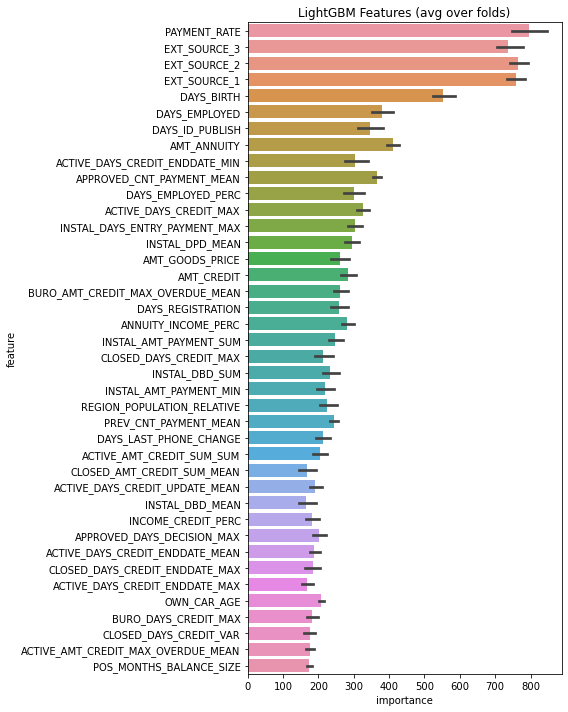

In [2]:
preprocess_total()

In [ ]:
La fonction précédente a réalisé tout un travail de feature engineering puis 

In [35]:
train_df_best40 = pd.read_csv('df_train_best40.csv')
print(train_df_best40.shape)
train_df_best40.head()

(206029, 41)


,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,...,APPROVED_DAYS_DECISION_MAX,APPROVED_CNT_PAYMENT_MEAN,POS_MONTHS_BALANCE_SIZE,INSTAL_DPD_MEAN,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,TARGET
0,296505.0,23904.0,247500.0,0.007274,-15441,-1089.0,-3544.0,-4006,8.0,0.425905,...,-635.0,12.0,13.0,0.857143,5.071429,71.0,381.420,184403.025,-274.0,0
1,2025000.0,77130.0,2025000.0,0.009334,-14913,-2052.0,-4399.0,-4423,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,288873.0,14179.5,238500.0,0.003813,-21789,NaN,-1508.0,-4151,NaN,0.544829,...,-356.0,24.0,11.0,0.000000,11.545455,127.0,10464.390,115108.290,-32.0,0
3,506889.0,19237.5,418500.0,0.022625,-21631,-3801.0,-11390.0,-5121,7.0,NaN,...,-305.0,20.0,39.0,0.196078,8.764706,447.0,3123.810,847355.895,-23.0,0
4,343800.0,10921.5,225000.0,0.007274,-22672,-776.0,-8376.0,-4166,NaN,NaN,...,-177.0,15.0,12.0,1.062500,8.812500,141.0,50.625,139841.370,-26.0,0


In [41]:
def TraitementValeursManquantes(df, threshold=0.60):
    # thresh est le taux de valeurs manquantes au-dessus
    # duquel on supprime la colonne
    msno.bar(df, color="darkblue")
    plt.show()

    taux_remp = 100*(1-df.isnull().sum().sum()
                     / (df.shape[0]*train_df_best40.shape[1]))
    print('Le dataset présente un taux de remplissage de '
          + str(round(taux_remp)) + '%.')

    print('Taille du dataset :', df.shape)
    N = (1-threshold) * df.shape[0]
    df.dropna(thresh=N, inplace=True, axis='columns')
    print('Taille du dataset après suppression des colonnes',
          'trop peu remplies :', df.shape)
    df.dropna(inplace=True)
    print('Taille du dataset après suppression des lignes ayant',
          'des valeurs manquantes:', df.shape)
    return df

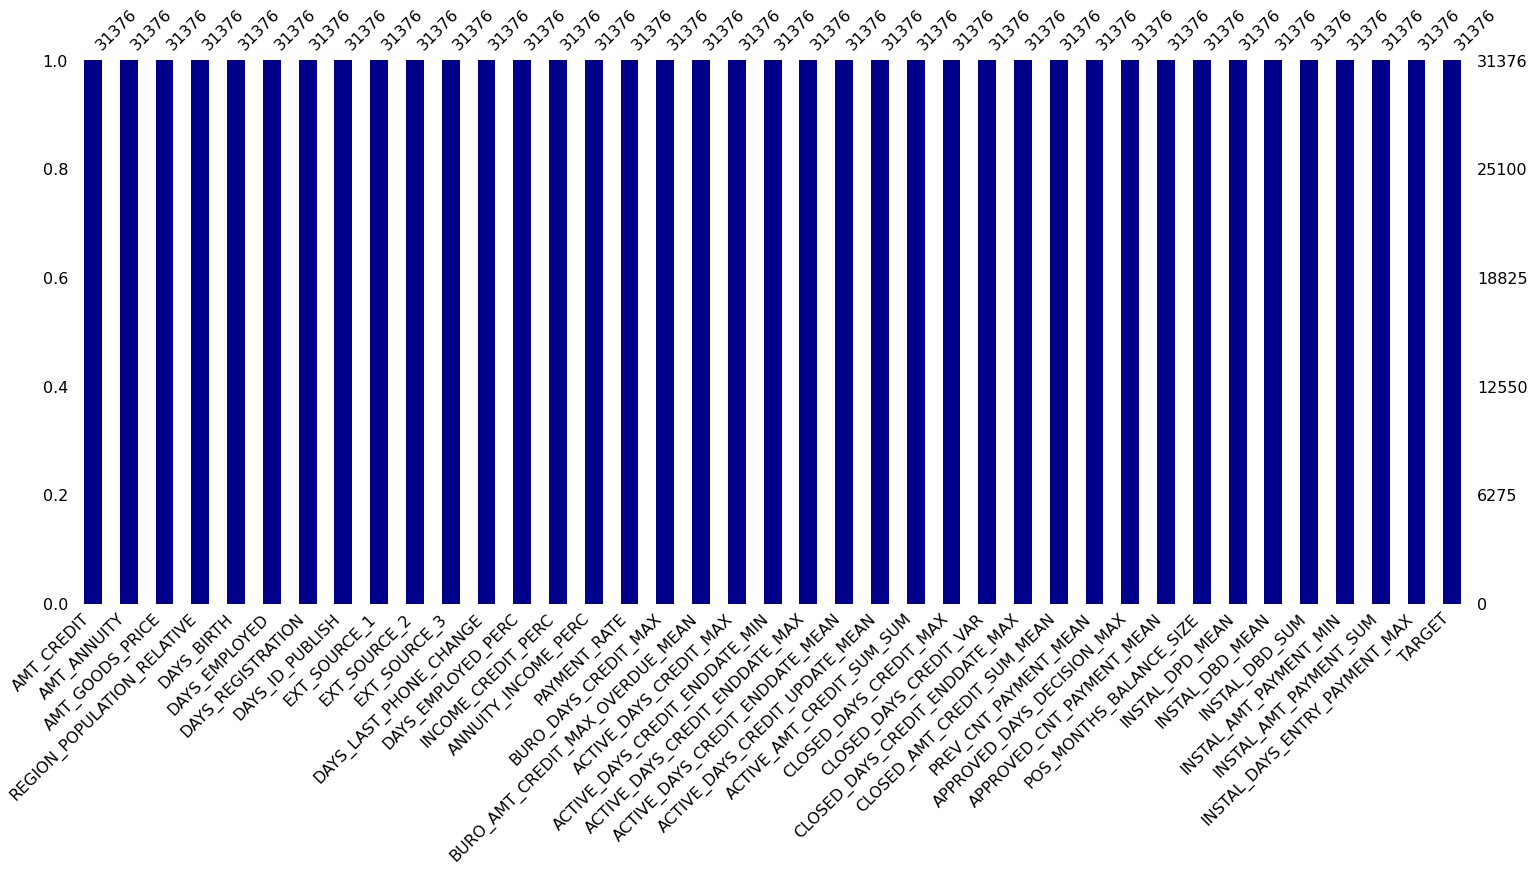

Le dataset présente un taux de remplissage de 100%.
Taille du dataset : (31376, 39)
Taille du dataset après suppression des colonnes trop peu remplies : (31376, 39)
Taille du dataset après suppression des lignes ayant des valeurs manquantes: (31376, 39)


In [42]:
train_df_best40 = TraitementValeursManquantes(train_df_best40)

In [37]:
train_df_best80 = pd.read_csv('df_train_best80.csv')
print(train_df_best80.shape)
train_df_best80.head()

(206029, 81)


,CODE_GENDER,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,TARGET
0,0,296505.0,23904.0,247500.0,0.007274,-15441,-1089.0,-3544.0,-4006,8.0,...,2195.511429,15368.580,381.420,13171.644643,184403.025,-274.0,-453.928571,-6355.0,NaN,0
1,0,2025000.0,77130.0,2025000.0,0.009334,-14913,-2052.0,-4399.0,-4423,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,288873.0,14179.5,238500.0,0.003813,-21789,NaN,-1508.0,-4151,NaN,...,0.000000,10464.390,10464.390,10464.390000,115108.290,-32.0,-187.545455,-2063.0,NaN,0
3,0,506889.0,19237.5,418500.0,0.022625,-21631,-3801.0,-11390.0,-5121,7.0,...,884.100000,34648.920,3123.810,16614.821471,847355.895,-23.0,-478.078431,-24382.0,0.4,0
4,1,343800.0,10921.5,225000.0,0.007274,-22672,-776.0,-8376.0,-4166,NaN,...,3046.789688,16268.535,50.625,8740.085625,139841.370,-26.0,-167.562500,-2681.0,NaN,0


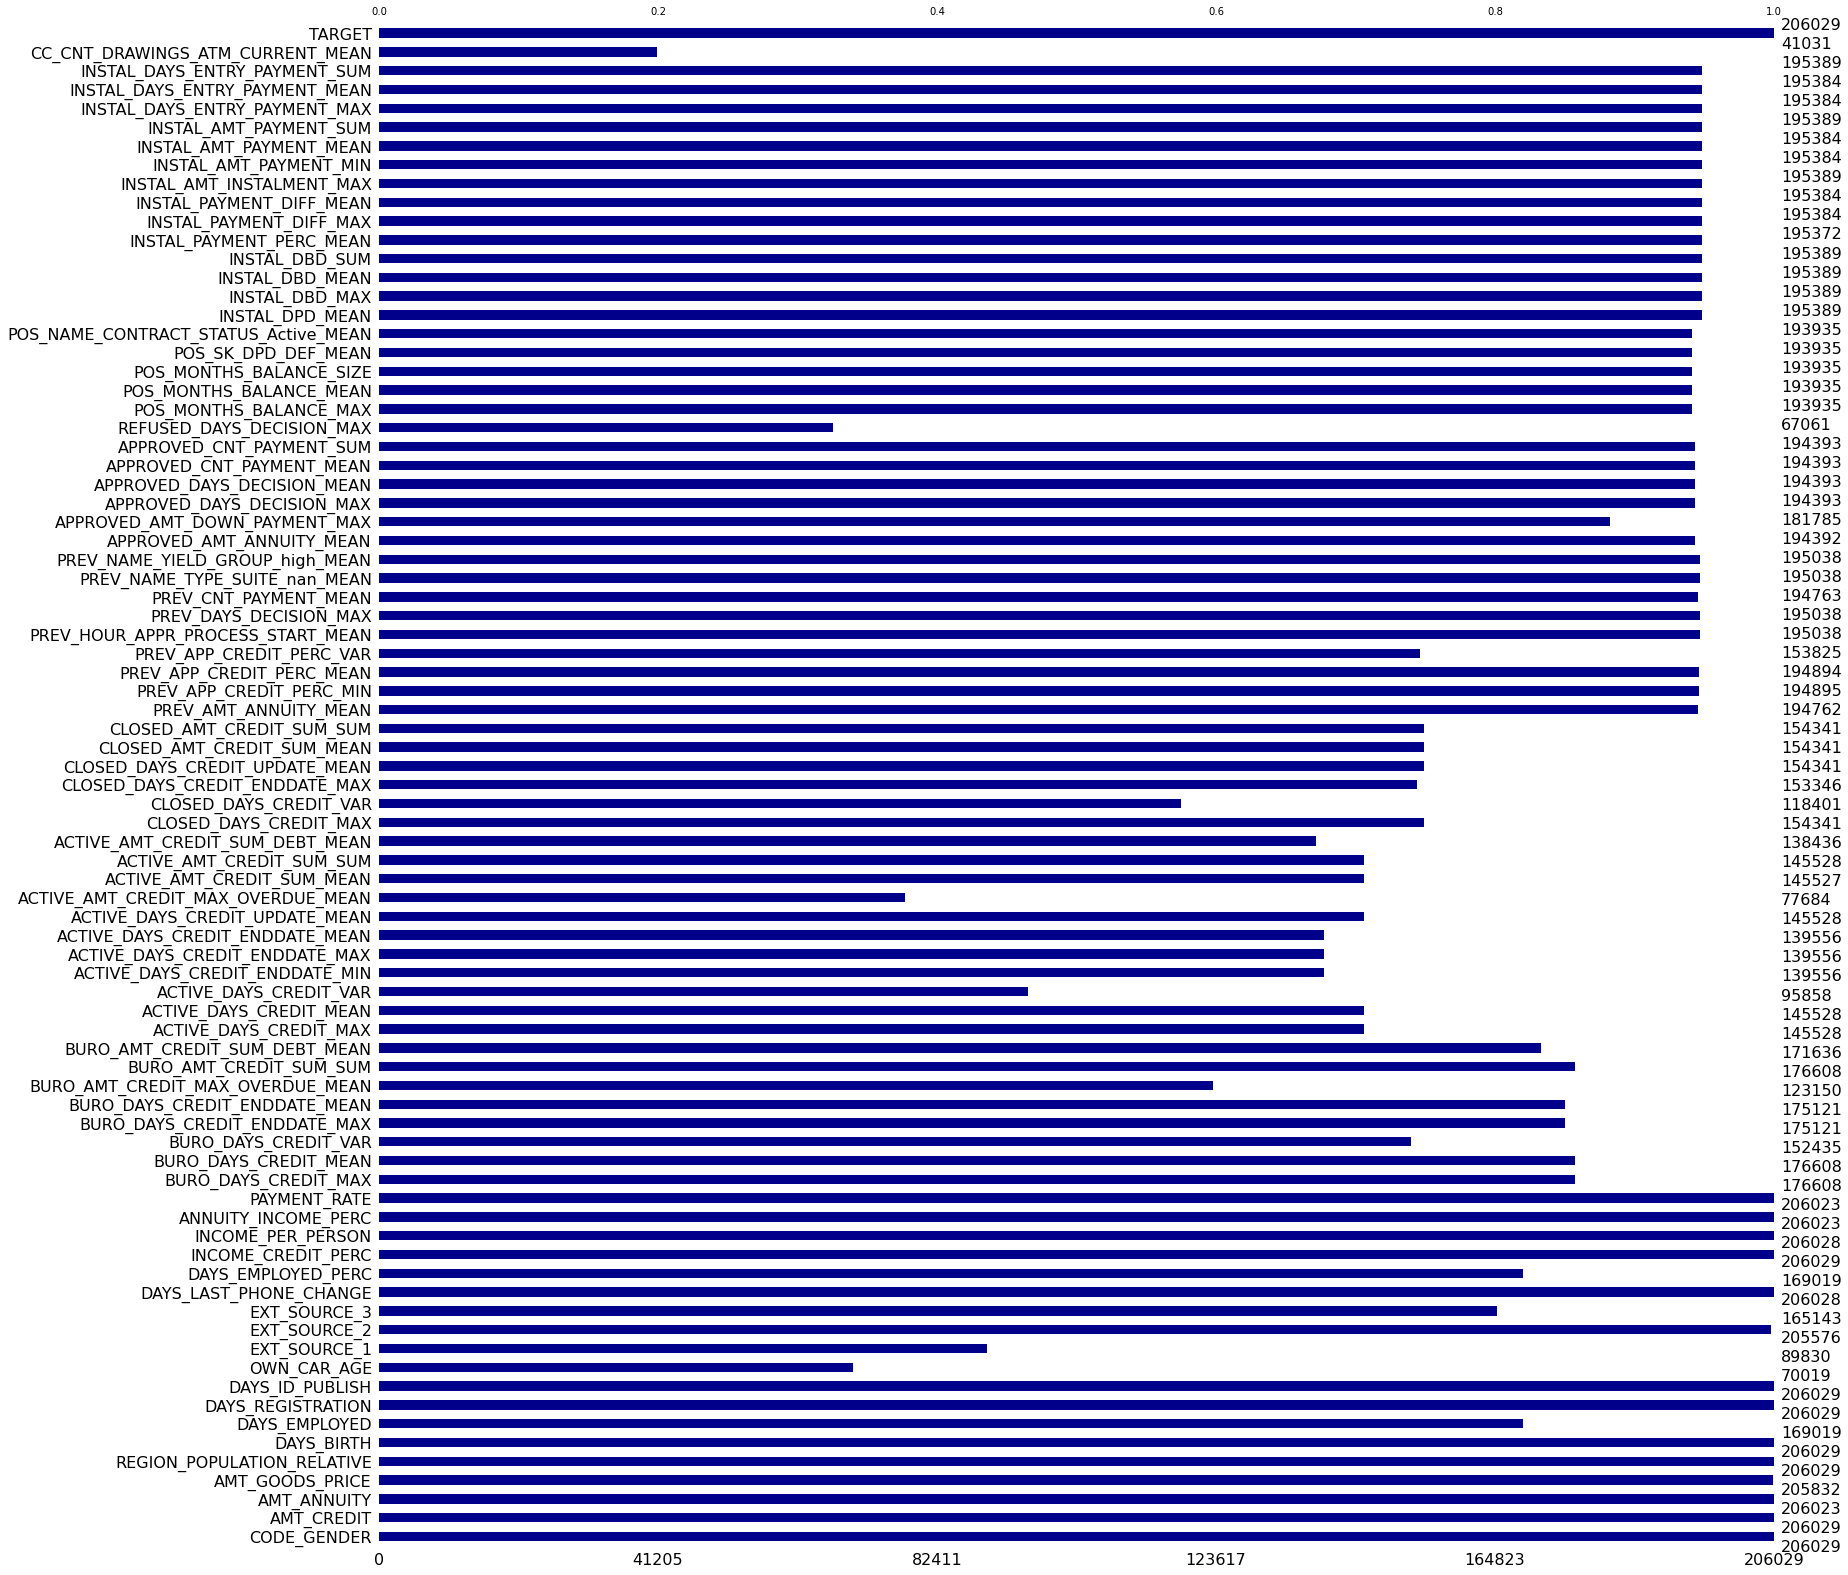

Le dataset présente un taux de remplissage de 68%.
Taille du dataset : (206029, 81)
Taille du dataset après suppression des colonnes     trop peu remplies : (206029, 77)
Taille du dataset après suppression des lignes ayant     des valeurs manquantes: (20123, 77)


In [38]:
train_df_best80 = TraitementValeursManquantes(train_df_best80)

In [43]:
test_df_best40 = pd.read_csv('df_test_best40.csv')
print(test_df_best40.shape)
test_df_best40.head()

(101478, 41)


,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,...,APPROVED_DAYS_DECISION_MAX,APPROVED_CNT_PAYMENT_MEAN,POS_MONTHS_BALANCE_SIZE,INSTAL_DPD_MEAN,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,TARGET
0,198666.0,15696.0,175500.0,0.025164,-9267,-2602.0,-372.0,-785,NaN,0.044202,...,-272.0,18.0,60.0,0.616667,10.783333,647.0,3.915,762885.585,-48.0,0.230804
1,247500.0,9814.5,247500.0,0.015221,-10916,-810.0,-532.0,-3534,NaN,0.543037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011392
2,521136.0,54855.0,495000.0,0.046220,-10066,-1273.0,-4059.0,-2511,NaN,NaN,...,-1059.0,10.0,11.0,2.250000,6.166667,74.0,0.180,46223.505,-752.0,0.107201
3,824917.5,39816.0,724500.0,0.046220,-18698,-5153.0,-8905.0,-2242,6.0,NaN,...,-976.0,36.0,32.0,0.147059,5.352941,182.0,1116.180,1455854.085,-4.0,0.052557
4,628114.5,22689.0,477000.0,0.018801,-18162,-7076.0,-7108.0,-1522,NaN,NaN,...,-869.0,6.0,13.0,0.166667,3.333333,40.0,11795.985,143114.040,-1465.0,0.032496


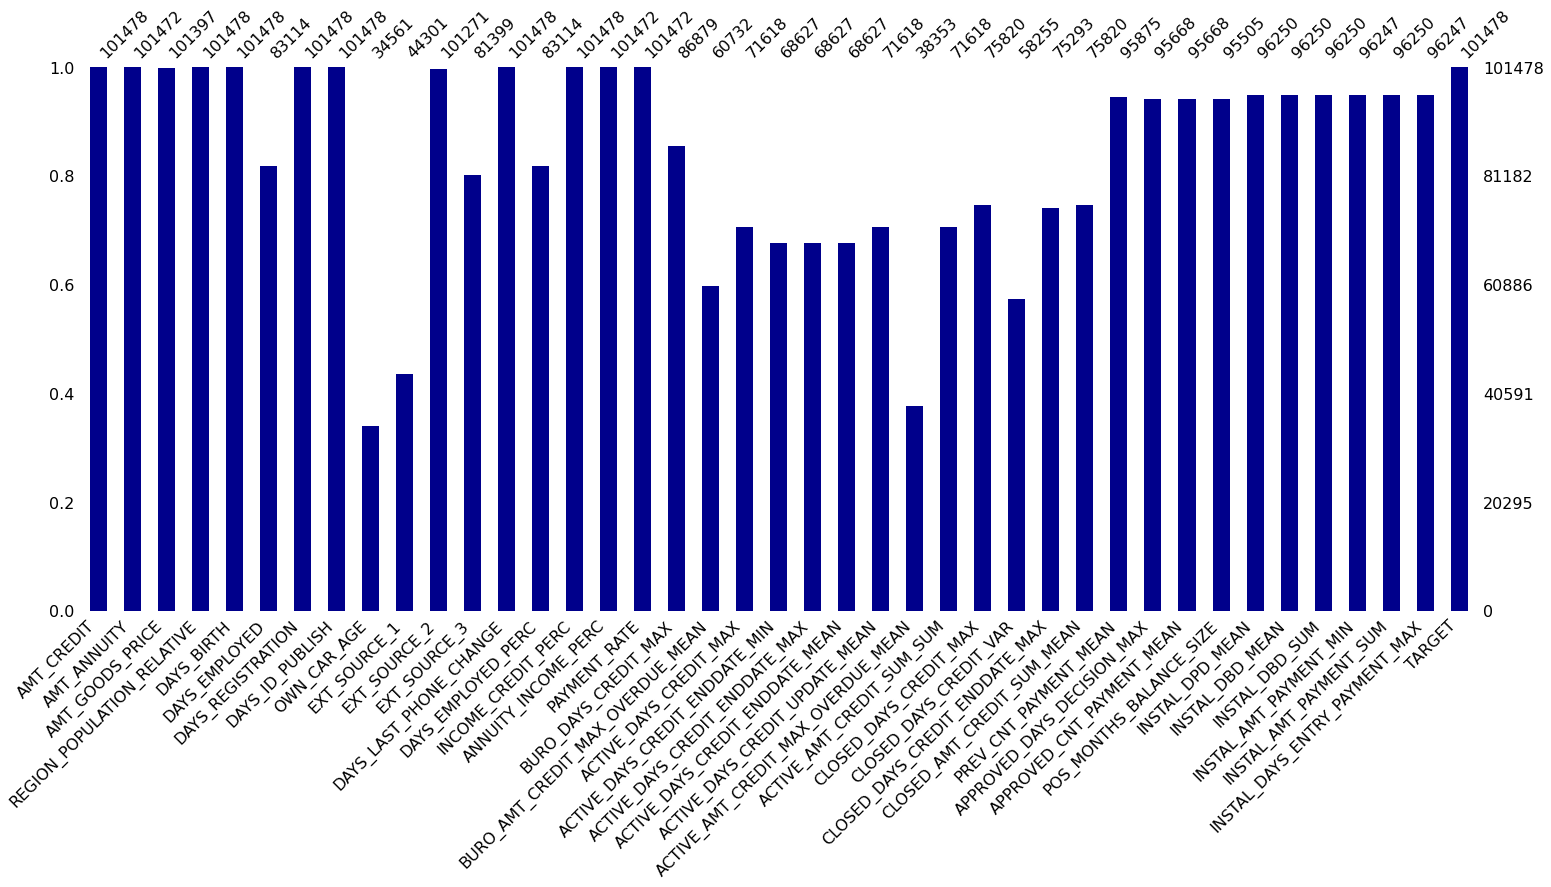

Le dataset présente un taux de remplissage de 83%.
Taille du dataset : (101478, 41)
Taille du dataset après suppression des colonnes trop peu remplies : (101478, 39)
Taille du dataset après suppression des lignes ayant des valeurs manquantes: (15407, 39)


In [44]:
test_df_best40 = TraitementValeursManquantes(test_df_best40)

In [45]:
test_df_best80 = pd.read_csv('df_test_best80.csv')
print(test_df_best80.shape)
test_df_best80.head()

(101478, 81)


,CODE_GENDER,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,TARGET
0,1,198666.0,15696.0,175500.0,0.025164,-9267,-2602.0,-372.0,-785,NaN,...,-1155.184500,80227.530,3.915,12714.759750,762885.585,-48.0,-1323.283333,-79397.0,NaN,0.230804
1,1,247500.0,9814.5,247500.0,0.015221,-10916,-810.0,-532.0,-3534,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011392
2,0,521136.0,54855.0,495000.0,0.046220,-10066,-1273.0,-4059.0,-2511,NaN,...,771.780000,4630.680,0.180,3851.958750,46223.505,-752.0,-893.416667,-10721.0,NaN,0.107201
3,0,824917.5,39816.0,724500.0,0.046220,-18698,-5153.0,-8905.0,-2242,6.0,...,1336.919559,45455.265,1116.180,42819.237794,1455854.085,-4.0,-460.147059,-15645.0,NaN,0.052557
4,1,628114.5,22689.0,477000.0,0.018801,-18162,-7076.0,-7108.0,-1522,NaN,...,0.000000,11938.005,11795.985,11926.170000,143114.040,-1465.0,-1634.166667,-19610.0,NaN,0.032496


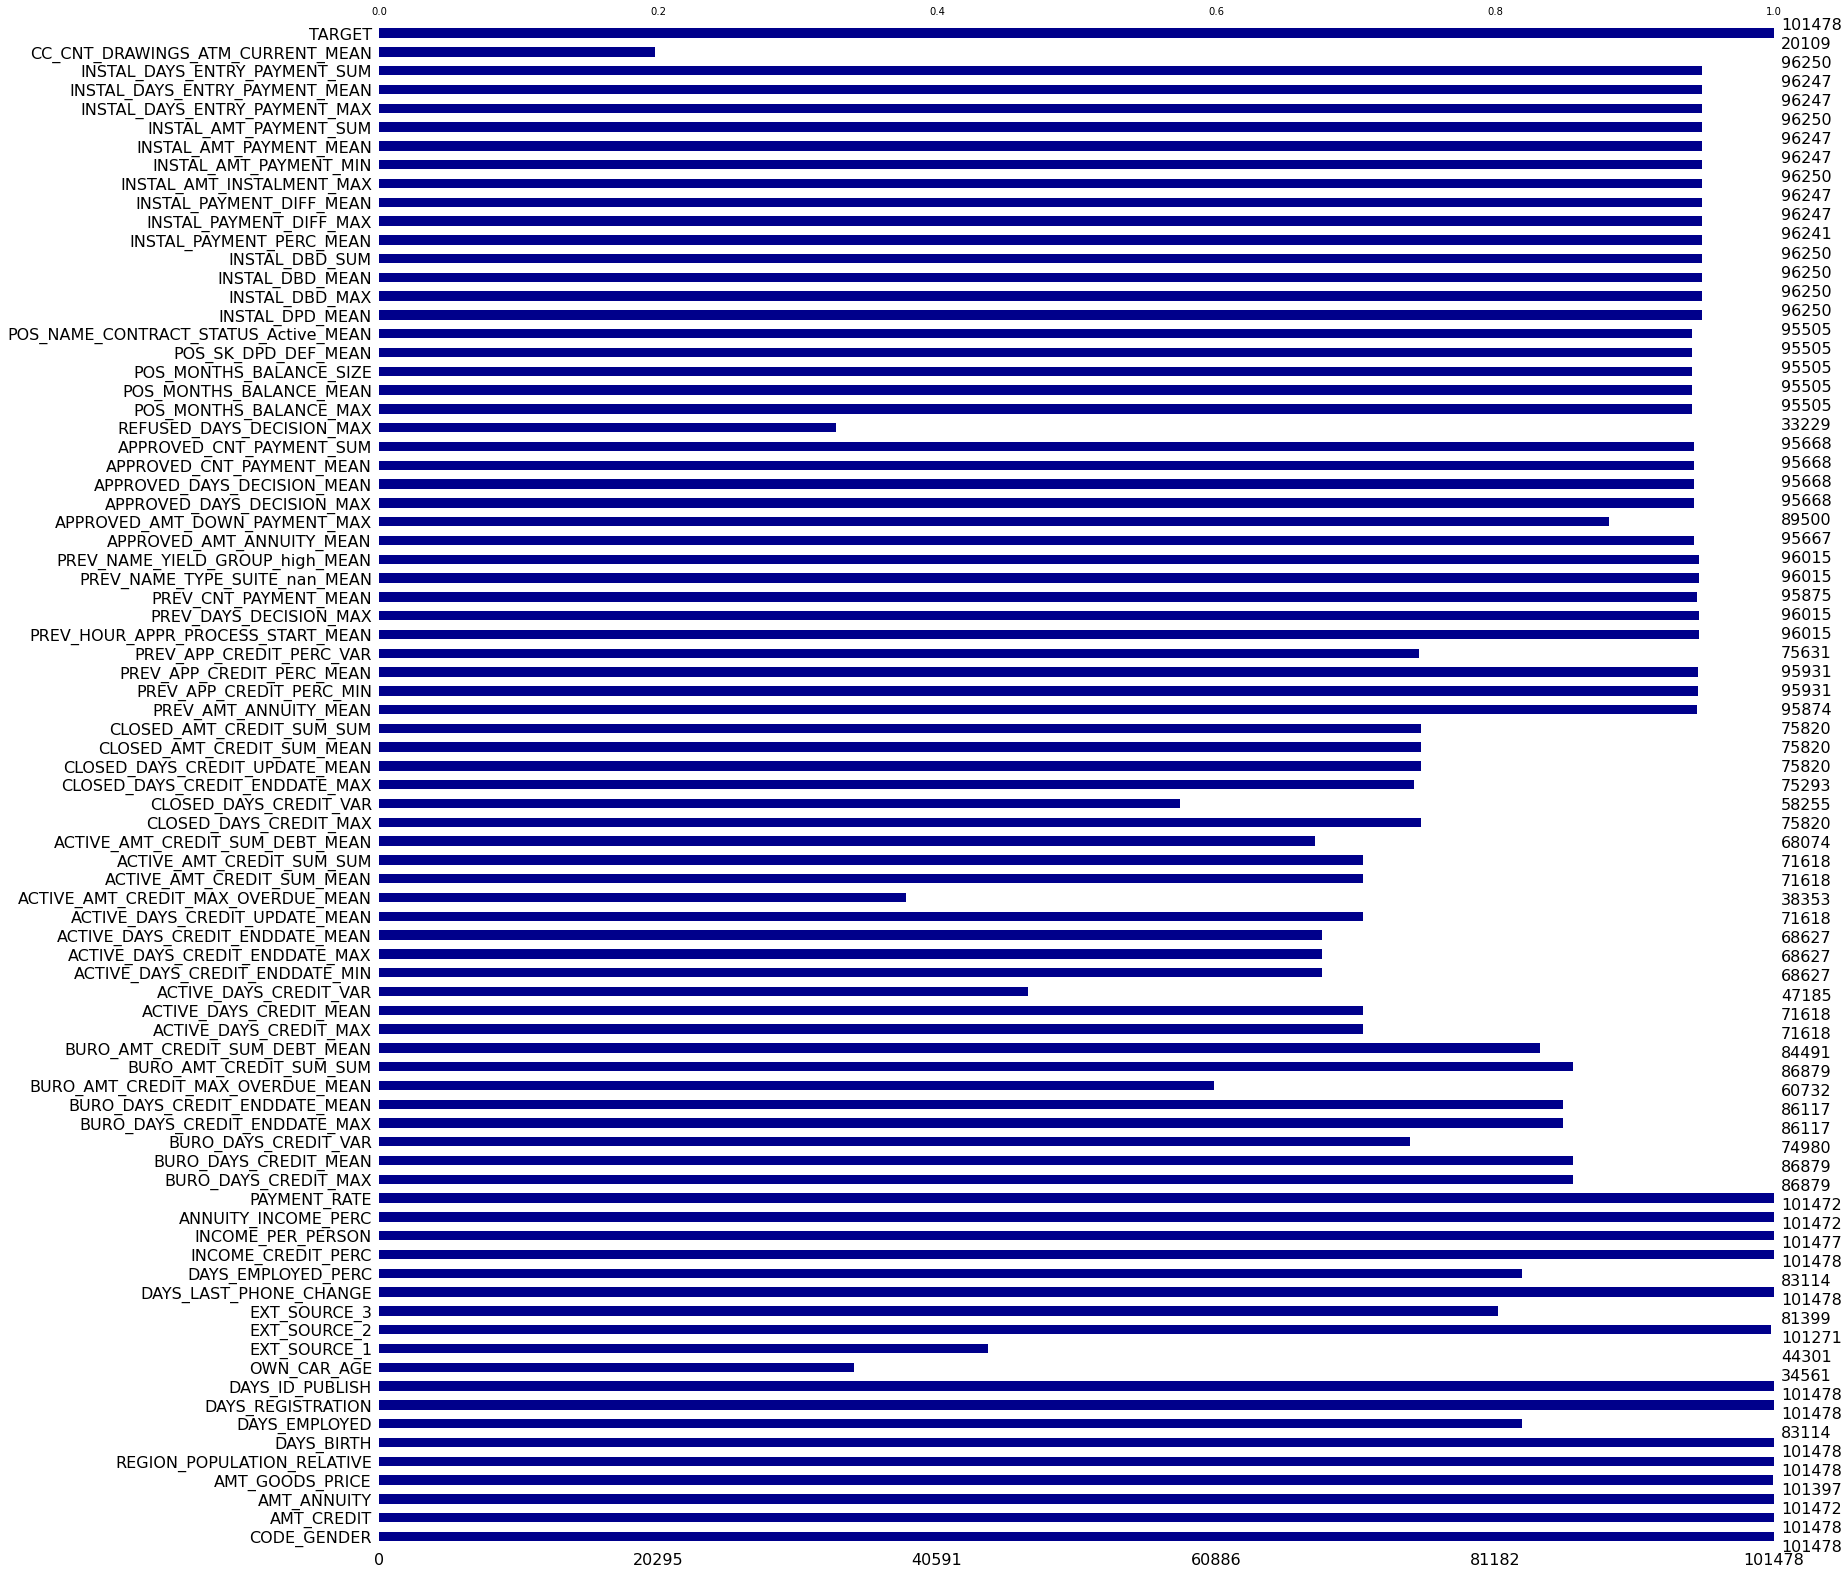

Le dataset présente un taux de remplissage de 68%.
Taille du dataset : (101478, 81)
Taille du dataset après suppression des colonnes trop peu remplies : (101478, 77)
Taille du dataset après suppression des lignes ayant des valeurs manquantes: (9899, 77)


In [46]:
test_df_best80 = TraitementValeursManquantes(test_df_best80)